<a href="https://colab.research.google.com/github/ChehrazadElb/PROJET-5/blob/main/Elbotout_Chehrazad_1_Notebook_011023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [ ]:
#Importation de la librairie Pandas
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Importation de la librairie plotly express
import plotly.express as px

In [ ]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium
pd.set_option("display.max_columns", None)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [ ]:
#Importation du fichier web.xlsx
df_web = pd.read_excel("web.xlsx")
#Importation du fichier erp.xlsx
df_erp = pd.read_excel("erp.xlsx")
#importation du fichier liaison.xlsx
df_liaison = pd.read_excel("liaison.xlsx")


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed



<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements du fichiers csv</h3>
</div>

<div style="color: RGB(255,114,0)">
<h3>Information Mentor</h3>
L'étudiant va être très certainement confronté à des difficultés pour ouvrir ce fichier.
Il faudra donc qu'il se documente sur les points suivants:<br>
- notion d'encodage en informatique. ("UTF-8", "ISO-8859-1", etc)<br>
- manipulation de fichier csv, tsv, etc<br>
<br>
Pour lui faire réussir cette étape, l'étudiant devrait suivre ces directives:<br>
- Explorer le fichier à l'aide d'un outil comme Notepad++ afin de visualiser la structure du fichier<br>
- ... ou d'utiliser Excel pour les mêmes raisons. Mais dans ce cas l'étudiant pourrait être tenté de convertir le fichier csv en xlsx, ce que je ne recommande pas: si le fichier est trop gros pour Excel cela deviendra une souffrance de procéder ainsi<br>
- apprendre à ourvrir un fichier avec python à l'aide de l'instruction suivante: <code>with open(nom_fichier, "rb") as f: </code><br>
- utiliser une bibliothèque comme <code>chardet</code> pour tenter d'identifier l'encodage du fichier<br>
</div>

In [ ]:
#Avant d'utiliser pandas pour le chargement du fichier, explorons la structure du fichier
#Pour cela utilisons l'instruction ci-dessous qui permet d'ouvrir un fichier texte
with open("caracteristiques_vins.csv", "rb") as f:
    file = f.read()

#Et affichons le:
print(file)

b"post_name;poids;R\xe9gion;Domaine;Appellation;Couleur;C\xe9page;Mill\xe9sime;Garde;Contenance;Degr\xe9 d'alcool;Temp\xe9rature d\xe9gustation;Alliance mets\r\npierre-jean-villa-saint-joseph-preface-2018;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Saint Joseph;Rouge;100% Syrah;2020;4-7 ans;75cl;13%;15\xb0C;Charcuterie, Lapin, Viande rouge, Volaille\r\npierre-jean-villa-saint-joseph-tilde-2017;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Saint Joseph;Rouge;100% Syrah;2019;6-8 ans;75cl;13%;15\xb0C;Charcuterie, Viande rouge, Volaille\r\npierre-jean-villa-croze-hermitage-accroche-coeur-2018;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Crozes-Hermitage;Rouge;100% Syrah;2020;3-5 ans;75cl;13%;15\xb0C;Viande rouge, Volaille\r\npierre-jean-villa-igp-gamine-2018;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Collines Rhodaniennes;Rouge;100% Syrah;2020;3-5 ans;75cl;13%;14\xb0C;Charcuterie, Viande rouge, Volaille\r\npierre-jean-villa-cote-rotie-carmina-2017;1.5 kg;Rh\xf4ne;Pierre Jean Villa;C\xf4te R\xf4tie;Rouge;100% Syrah;2019;10-20 ans;7

In [ ]:
#Vous avez dû constater que les champs sont séparées par des point-virgule

#tentons d'ouvrir le fichier avec pandas avec cet élément
df_caracteristiques = pd.read_csv("caracteristiques_vins.csv", sep=";")

UnicodeDecodeError: ignored

Nous obtenons une erreur, elle est de type <code>UnicodeDecodeError</code><br>
Celle-ci semble être liée à l'encodage du fichier<br>
Utilisons la bibliothèque <code>chardet</code> pour tenter d'identifier l'encodage du fichier

In [ ]:
#Importation de la bibilothèque
#(à noter que c'est une mauvaise pratique d'importer une bibliothèque au milieu d'un programme)
#(celle-ci doit toujours figurer au début du script)
import chardet

Rendez-vous sur le lien ci-après pour identifier l'instruction dont vous aurez besoin:<br>
https://chardet.readthedocs.io/en/latest/usage.html#basic-usage

In [ ]:
#Identification de l'encodage du fichier
chardet.detect(file)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [ ]:
#A présent que nous connaissons les séparateurs et l'encodage du fichier
#Utilisons Pandas pour charger le fichier
#Je vous laisse le soin de renseigner les champs manquants
nom_du_fichier = "caracteristiques_vins.csv"
type_de_separateur = ";"
encodage_du_fichier_csv = "Windows-1252"

df_caracteristiques = pd.read_csv(nom_du_fichier, sep=type_de_separateur, encoding=encodage_du_fichier_csv)

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [ ]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 5 colonne(s)


In [ ]:
#Consulter le nombre de colonnes
df_erp.shape
print (df_erp.shape)
#La nature des données dans chacune des colonnes
df_erp.dtypes
print ( df_erp.dtypes)
#Le nombre de valeurs présentes dans chacune des colonnes
column_value_counts = df_erp.count()
print ( column_value_counts)


(825, 5)
product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object
product_id        825
onsale_web        825
price             825
stock_quantity    825
stock_status      825
dtype: int64


In [ ]:
#Afficher les 5 premières lignes de la table
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [ ]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
duplicated = df_erp.duplicated(subset=['product_id'])
print (duplicated.any())

False


In [ ]:
#Afficher les valeurs distinctes de la colonne stock_status
distinct_values = df_erp['stock_status'].unique()
print(distinct_values)
#À quelle(s) autre(s) colonne(s) sont-elles liées ?
#stock_quantity



['outofstock' 'instock']


In [ ]:
#Création d'une colonne "stock_status_2
df_erp['stock_status_2'] = df_erp['stock_quantity'].apply(lambda x: 'instock' if x > 0 else 'outofstock')

#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"


In [ ]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]


#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

0      True
1      True
2      True
3      True
4      True
       ... 
820    True
821    True
822    True
823    True
824    True
Length: 825, dtype: bool

In [ ]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset
(df_erp["stock_status"] == df_erp["stock_status_2"]).sum()


824

In [ ]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
incoherences = df_erp[df_erp["stock_status"] != df_erp["stock_status_2"]]
print (incoherences)
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3

     product_id  onsale_web  price  stock_quantity stock_status stock_status_2
443        4954           1   25.0               0      instock     outofstock


In [ ]:
#Corriger la ou les données incohérentes
df_erp.loc[443, 'stock_status'] = 'outofstock'

In [ ]:
print(df_erp.iloc[443])

product_id              4954
onsale_web                 1
price                   25.0
stock_quantity             0
stock_status      outofstock
stock_status_2    outofstock
Name: 443, dtype: object


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [ ]:
###############
## LES PRIX  ##
###############



#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
#Afficher le ou les prix non renseignés dans la colonne "price"
print("Nombres d'article avec un prix non renseignés: {}".format(df_erp['price'].isnull().sum()))
#Saisir l'instruction manquante dans la fonction format


#Afficher le prix minimum de la colonne "price
prix_minimum = df_erp['price'].min()
print("Le prix minimum dans la colonne 'price': {}€".format(prix_minimum))

#Afficher le prix maximum de la colonne "price"
prix_maximum = df_erp['price'].max()
print("Le prix maximum dans la colonne 'price': {}€".format(prix_maximum))


Nombres d'article avec un prix non renseignés: 0
Le prix minimum dans la colonne 'price': 5.2€
Le prix maximum dans la colonne 'price': 225.0€


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [ ]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
quantite_minimum = df_erp['stock_quantity'].min()
print("La quantité minimum dans la colonne 'stock quantity' est :", quantite_minimum)

#Afficher la quantité maximum de la colonne "stock_quantity"
quantite_maximum = df_erp ['stock_quantity'].max()
print("La quantité maximum dans la colonne 'stock quantity' est :", quantite_maximum)


La quantité minimum dans la colonne 'stock quantity' est : 0
La quantité maximum dans la colonne 'stock quantity' est : 578


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [ ]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?
df_erp['onsale_web'].unique()

array([1, 0])

In [ ]:
print('1 = True -> en vente')
print('0 = False -> pas en vente')

1 = True -> en vente
0 = False -> pas en vente


In [ ]:
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [ ]:
#Quelles sont les colonnes à conserver selon vous?
print('Les colonnes à conserver sont product_id, onsale_web, price et sock_quantity')


Les colonnes à conserver sont product_id, onsale_web, price et sock_quantity


In [ ]:
#Supprimer les colonnes comportant le libellé "stock_status"
#Cette colonne est redondante avec la colonne "stock_quantity". Dans notre projet cette information n'est pas utile.

df_erp.drop(columns=['stock_status'], inplace = True)

In [ ]:
df_erp.drop(columns=['stock_status_2'], inplace = True)

In [ ]:
df_erp.head()

,product_id,onsale_web,price,stock_quantity
0,3847,1,24.2,0
1,3849,1,34.3,0
2,3850,1,20.8,0
3,4032,1,14.1,0
4,4039,1,46.0,0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>


In [ ]:
#Dimension du dataset
#Nombre d'observations
#Nombre de caractéristiques
print ('Le fichier web contient {} observations'.format(df_web.shape[0]))
print ('Le fichier web contient {} caractéristiques'.format(df_web.shape[1]))

Le fichier web contient 1513 observations
Le fichier web contient 28 caractéristiques


In [ ]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [ ]:
df_web[df_web['sku']==15298]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
799,15298,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,NaN,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [ ]:
#Selon vous, quelles sont les colonnes à conserver ?
print('Les colonnes à consever sont toutes celles qui ne contiennent pas "0 non-null"')

Les colonnes à consever sont toutes celles qui ne contiennent pas "0 non-null"


In [ ]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
df_web.drop(['tax_class', 'post_content','post_password','post_content_filtered'], axis=1)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,NaN,publish,closed,closed,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,Camin Larredya Jurançon Sec La Virada 2018,NaN,publish,closed,closed,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,NaN,publish,closed,closed,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,NaN,publish,closed,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [ ]:
# Visualisation des valeurs de la colonne sku
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?

print('Les valeurs qui ne respectent pas la règle de codification sont : "bon-cadeau-25-euros", "nan", "13127-1"')
df_web["sku"].unique()

Les valeurs qui ne respectent pas la règle de codification sont : "bon-cadeau-25-euros", "nan", "13127-1"


array(['bon-cadeau-25-euros', 15298, 15296, 15300, 19814, 19815, 15303,
       14975, 16042, 14980, 16041, 15269, 14977, 16044, 16043, 16449,
       16045, 16030, 13127, 19816, 16029, 16039, 16318, 16275, 16498,
       16320, 16319, 15966, 15022, 15967, 15490, 16416, 11862, 15444,
       15953, 12045, 13074, 15941, 16069, 13072, 15440, 13435, 13078,
       13117, 16296, 16014, 16462, 16013, 16180, 15676, 16120, 15564,
       15675, 15378, 15813, 13416, 14905, 15767, 16505, 15683, 16504,
       15787, 14800, 15353, 15382, 15339, 11668, 13209, 15341, 13217, 304,
       11641, 1662, 1360, 15648, 1364, 7086, 1366, 15140, 16238, 16237,
       15141, 14944, 14941, 14751, 16093, 15668, 15373, 15375, 14474,
       15482, 13453, 15075, 16124, 15785, 15784, 15786, 14332, 16210,
       16211, 16209, 15629, 15583, 16160, 16166, 15783, 16560, 15747,
       15746, 16190, 16189, 16265, 16191, 16263, 15605, 16529, 15441,
       13032, 16256, 16322, 16295, 15656, 15655, 15415, 15414, 15413,
       1602

In [ ]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?
df_web[df_web["sku"] == "13127-1"]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
797,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,NaN,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",publish,closed,closed,NaN,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,NaN,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,NaN,publish,closed,closed,NaN,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [ ]:
df_web[df_web["sku"] == 'bon-cadeau-25-euros']

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1209,bon-cadeau-25-euros,0,0,0,0.0,10.0,NaN,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,NaN,publish,closed,closed,NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [ ]:
#Pour les codes articles identifiés, réalisé une analyse et définissez l'action à entreprendre
print('Les lignes qui ne respectent pas la codification sont identifiées mais doivent être conservées')

Les lignes qui ne respectent pas la codification sont identifiées mais doivent être conservées


In [ ]:
#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?
df_web.duplicated().sum()

82

In [ ]:
df_web = df_web.drop_duplicates(keep=False)

In [ ]:
df_web.duplicated().sum()

0

In [ ]:
#Identifier les lignes sans code articles
df_web[df_web['sku'].isna()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,NaN,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,closed,closed,NaN,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,NaN,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,closed,closed,NaN,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [ ]:
df_web = df_web[df_web["sku"].notnull()]

In [ ]:
#Les lignes sans code article semble être toutes non renseignés
#Pour s'en assurer réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
df = df_web[df_web['sku'].isna()]
#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseignées dans chacune des colonnes
df.info()
#3 - Que constatez-vous?
print ('Tous les sku sont non-null')
print ('virtual, downloadable, rating_count contiennent 85 valeurs')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    0 non-null      object        
 1   virtual                0 non-null      int64         
 2   downloadable           0 non-null      int64         
 3   rating_count           0 non-null      int64         
 4   average_rating         0 non-null      float64       
 5   total_sales            0 non-null      float64       
 6   tax_status             0 non-null      object        
 7   tax_class              0 non-null      float64       
 8   post_author            0 non-null      float64       
 9   post_date              0 non-null      datetime64[ns]
 10  post_date_gmt          0 non-null      datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             0 non-null      object        
 13  post_excerpt     

In [ ]:
doublons_sku_df_web = df_web[df_web["sku"].duplicated(keep=False)].copy()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [ ]:
#Dimension du dataset
#Nombre d'observations
#Nombre de caractéristiques
print ('Le fichier liaison contient {} observations'.format(df_liaison.shape[0]))
print ('Le fichier liaison contient {} caractéristiques'.format(df_liaison.shape[1]))


Le fichier liaison contient 825 observations
Le fichier liaison contient 2 caractéristiques


In [ ]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [ ]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?
df_liaison["product_id"].unique().size == df_liaison.shape[0]

True

In [ ]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
df_liaison["id_web"].unique().size == df_liaison.shape[0]

False

In [ ]:
#Avons-nous des articles sans correspondances?
print("Il y a {} articles sans correspondances".format(df_liaison["id_web"].isnull().sum()))

Il y a 91 articles sans correspondances


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.4 - Analyse exploratoire du fichier caracteristiques_vins.xlsx</h3>
</div>

In [ ]:
#Dimension du dataset
#Nombre d'observations

#Nombre de caractéristiques
print("Le tableau comporte {} observation(s)".format(df_caracteristiques.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_caracteristiques.shape[1]))

Le tableau comporte 611 observation(s)
Le tableau comporte 13 colonne(s)


In [ ]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_caracteristiques.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   post_name                611 non-null    object 
 1   poids                    611 non-null    object 
 2   Région                   586 non-null    object 
 3   Domaine                  577 non-null    object 
 4   Appellation              559 non-null    object 
 5   Couleur                  566 non-null    object 
 6   Cépage                   571 non-null    object 
 7   Millésime                541 non-null    float64
 8   Garde                    569 non-null    object 
 9   Contenance               611 non-null    object 
 10  Degré d'alcool           586 non-null    object 
 11  Température dégustation  574 non-null    object 
 12  Alliance mets            574 non-null    object 
dtypes: float64(1), object(12)
memory usage: 62.2+ KB


In [ ]:
#Affichage des 5 premières lignes du dataset
df_caracteristiques.head()

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
0,pierre-jean-villa-saint-joseph-preface-2018,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2020.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille"
1,pierre-jean-villa-saint-joseph-tilde-2017,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2019.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille"
2,pierre-jean-villa-croze-hermitage-accroche-coe...,1.5 kg,Rhône,Pierre Jean Villa,Crozes-Hermitage,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,15°C,"Viande rouge, Volaille"
3,pierre-jean-villa-igp-gamine-2018,1.5 kg,Rhône,Pierre Jean Villa,Collines Rhodaniennes,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,14°C,"Charcuterie, Viande rouge, Volaille"
4,pierre-jean-villa-cote-rotie-carmina-2017,1.5 kg,Rhône,Pierre Jean Villa,Côte Rôtie,Rouge,100% Syrah,2019.0,10-20 ans,75cl,13%,17°C,"Gibier, Viande rouge"


In [ ]:
#Quels sont les produits avec des informations manquantes?
print('Les produits pour lesquels il manque des informations sont ceux de la colonne Appellation')

Les produits pour lesquels il manque des informations sont ceux de la colonne Appellation


In [ ]:
df_caracteristiques.loc[df_caracteristiques.isnull().any(axis=1)]

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
60,gosset-champagne-grande-reserve,1.5 kg,Champagne,Gosset,Champagne,Blanc,"10% Pinot Meunier, 45% Chardonnay, 45% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Fruits cuits, Sucré-salé, Tajine"
62,champagne-gosset-grand-rose,1.5 kg,Champagne,Gosset,Champagne,NaN,"50% Chardonnay, 50% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Desserts, Foie gras, Poissons"
63,champagne-mailly-gc-brut-reserve,1.5 kg,Champagne,Mailly Grand Cru,Champagne,Blanc,"25% Chardonnay, 75% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Chaource, Légumes croquants, Suprême..."
64,champagne-mailly-grand-cru-extra-brut-2012,1.5 kg,Champagne,Mailly Grand Cru,Champagne,Blanc,"25% Chardonnay, 75% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Carpaccios, Caviar, Huîtres"
65,champagne-mailly-grand-cru-brut-rose,1.5 kg,Champagne,Mailly Grand Cru,Champagne,NaN,"10% Chardonnay, 90% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Tapas, Viande Blanche"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,saumaize-michelin-pouilly-fuisse-ampelopsis-2016,1.5 kg,Bourgogne,Saumaize-Michelin,Pouilly-Fuissé,Blanc,Chardonnay,2018.0,NaN,75cl,13%,12°C,"Apéritif, Fromages, Poissons, Volaille"
581,la-preceptorie-cotes-du-roussillon-coume-marie...,1.5 kg,Languedoc-Roussillon,La Preceptorie,NaN,Blanc,"Carignan Blanc, Grenache Blanc, Grenache Gris,...",2020.0,6-8 ans,75cl,15%,12°C,"Poisson en sauce, Viande Blanche, Volaille"
582,la-preceptorie-cotes-du-roussillon-blanc-terre...,1.5 kg,Languedoc-Roussillon,La Preceptorie,NaN,Blanc,"Grenache Gris, Macabeu",2020.0,6-8 ans,75cl,15%,12°C,"Crustacés, Fruits de mer, Poisson grillé"
601,emile-boeckel-cremant-chardonnay-extra-brut-2016,1.5 kg,Alsace,Emile Boeckel,Crémant d'Alsace,Blanc,Chardonnay,NaN,3-5 ans,75cl,12%,9°C,"Apéritif, Fromages, Huîtres, Poissons"


In [ ]:
#Est-il possible de corriger les données manquantes?
df_caracteristiques['Appellation'] = df_caracteristiques['post_name']

In [ ]:
df_caracteristiques

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
0,pierre-jean-villa-saint-joseph-preface-2018,1.5 kg,Rhône,Pierre Jean Villa,pierre-jean-villa-saint-joseph-preface-2018,Rouge,100% Syrah,2020.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille"
1,pierre-jean-villa-saint-joseph-tilde-2017,1.5 kg,Rhône,Pierre Jean Villa,pierre-jean-villa-saint-joseph-tilde-2017,Rouge,100% Syrah,2019.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille"
2,pierre-jean-villa-croze-hermitage-accroche-coe...,1.5 kg,Rhône,Pierre Jean Villa,pierre-jean-villa-croze-hermitage-accroche-coe...,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,15°C,"Viande rouge, Volaille"
3,pierre-jean-villa-igp-gamine-2018,1.5 kg,Rhône,Pierre Jean Villa,pierre-jean-villa-igp-gamine-2018,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,14°C,"Charcuterie, Viande rouge, Volaille"
4,pierre-jean-villa-cote-rotie-carmina-2017,1.5 kg,Rhône,Pierre Jean Villa,pierre-jean-villa-cote-rotie-carmina-2017,Rouge,100% Syrah,2019.0,10-20 ans,75cl,13%,17°C,"Gibier, Viande rouge"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,chateau-jean-faure-saint-emilion-grand-cru-2016,1.5 kg,Bordeaux,Château Jean Faure,chateau-jean-faure-saint-emilion-grand-cru-2016,Rouge,"Cabernet Franc, Malbec, Merlot",2016.0,15 ans et +,75cl,"13,5%",18°C,"Filet de boeuf, Gibier, Magret de Canard"
607,mouthes-le-bihan-aime-chai-2015,1.5 kg,Sud Ouest,Mouthes Le Bihan,mouthes-le-bihan-aime-chai-2015,Rouge,"Cabernet Sauvignon, Malbec, Merlot",2016.0,4-7 ans,75cl,"13,5%",14°C,"Boeuf aux carottes, Pommes de terre sarladaise..."
608,camin-larredya-jurancon-sec-la-virada-2018,1.5 kg,Sud Ouest,Camin Larredya,camin-larredya-jurancon-sec-la-virada-2018,Blanc,"Gros Manseng, Petit Courbu, Petit Manseng",2018.0,8-10 ans,75cl,14%,11°C,"Charcuterie, Fromages, Poissons, Viande Blanche"
609,jamet-cote-rotie-fructus-voluptas-2018,1.5 kg,Rhône,Jamet,jamet-cote-rotie-fructus-voluptas-2018,Rouge,Syrah,2020.0,10 ans et +,75cl,13%,16°C,"Agneau, Gibier, Pigeon, Viande rouge"


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [ ]:
#Fusion d es fichiers df_erp et df_liaison
df_merge = pd.merge(df_erp, df_liaison, how="outer", on="product_id", indicator=True)

In [ ]:
df_merge

,product_id,onsale_web,price,stock_quantity,id_web,_merge
0,3847,1,24.2,0,15298,both
1,3849,1,34.3,0,15296,both
2,3850,1,20.8,0,15300,both
3,4032,1,14.1,0,19814,both
4,4039,1,46.0,0,19815,both
...,...,...,...,...,...,...
820,7203,0,45.0,30,NaN,both
821,7204,0,45.0,9,NaN,both
822,7247,1,54.8,23,13127-1,both
823,7329,0,26.5,14,14680-1,both


In [ ]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?
df_merge[df_merge["_merge"] != "both"]

,product_id,onsale_web,price,stock_quantity,id_web,_merge


In [ ]:
df_merge.drop("_merge", axis=1, inplace=True)
























<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [ ]:
#Fusionnez les datasets df_merge et df_web
liste_colonnes_conserves = ["sku", "total_sales", "post_title", "post_excerpt", "post_name"]
df_merge = pd.merge(df_merge, df_web[liste_colonnes_conserves], left_on="id_web", right_on="sku", how="outer", indicator=True)

In [ ]:
#Avons-nous des lignes sans correspondances?
df_sans_correspondance = df_merge[df_merge["_merge"] != "both"]
#111 lignes sans correspondances
df_sans_correspondance.shape

(111, 11)

In [ ]:
df_sans_correspondance

,product_id,onsale_web,price,stock_quantity,id_web,sku,total_sales,post_title,post_excerpt,post_name,_merge
38,4055,0,86.1,0,NaN,NaN,NaN,NaN,NaN,NaN,left_only
39,4090,0,73.0,0,NaN,NaN,NaN,NaN,NaN,NaN,left_only
40,4092,0,47.0,0,NaN,NaN,NaN,NaN,NaN,NaN,left_only
41,4195,0,14.1,0,NaN,NaN,NaN,NaN,NaN,NaN,left_only
42,4209,0,73.5,0,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...
1328,5954,0,18.8,0,15609,NaN,NaN,NaN,NaN,NaN,left_only
1329,5955,0,27.3,0,14377,NaN,NaN,NaN,NaN,NaN,left_only
1332,5957,0,39.0,0,13577,NaN,NaN,NaN,NaN,NaN,left_only
1377,6100,0,12.9,0,15529,NaN,NaN,NaN,NaN,NaN,left_only


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.3 - Jonction du fichier df_merge et df_caracteristiques</h3>
</div>

In [ ]:
#Fusion de la table df_merge et df_caracteristiques
df_merge = pd.merge(df_merge, df_caracteristiques, on="post_name", how="left")

In [ ]:
df_merge

,product_id,onsale_web,price,stock_quantity,id_web,sku,total_sales,post_title,post_excerpt,post_name,_merge,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
0,3847,1,24.2,0,15298,15298,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018,both,1.5 kg,Rhône,Pierre Jean Villa,pierre-jean-villa-saint-joseph-preface-2018,Rouge,100% Syrah,2020.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille"
1,3847,1,24.2,0,15298,15298,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,NaN,pierre-jean-villa-saint-joseph-preface-2018,both,1.5 kg,Rhône,Pierre Jean Villa,pierre-jean-villa-saint-joseph-preface-2018,Rouge,100% Syrah,2020.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille"
2,3849,1,34.3,0,15296,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017,both,1.5 kg,Rhône,Pierre Jean Villa,pierre-jean-villa-saint-joseph-tilde-2017,Rouge,100% Syrah,2019.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille"
3,3849,1,34.3,0,15296,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,NaN,pierre-jean-villa-saint-joseph-tilde-2017,both,1.5 kg,Rhône,Pierre Jean Villa,pierre-jean-villa-saint-joseph-tilde-2017,Rouge,100% Syrah,2019.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille"
4,3850,1,20.8,0,15300,15300,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...,both,1.5 kg,Rhône,Pierre Jean Villa,pierre-jean-villa-croze-hermitage-accroche-coe...,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,15°C,"Viande rouge, Volaille"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,7247,1,54.8,23,13127-1,13127-1,0.0,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",clos-du-mont-olivet-chateauneuf-du-pape-2007-2,both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1535,7247,1,54.8,23,13127-1,13127-1,0.0,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,NaN,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1536,7329,0,26.5,14,14680-1,NaN,NaN,NaN,NaN,NaN,left_only,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1537,7338,1,16.3,45,16230,16230,0.0,Domaine Saint-Nicolas Vin de France Blanc Les ...,Issu d'un assemblage de chenin blanc et de cha...,domaine-saint-nicolas-fiefs-vendeens-blanc-les...,both,1.5 kg,Vallée de la Loire,Saint-Nicolas,domaine-saint-nicolas-fiefs-vendeens-blanc-les...,Blanc,"Chardonnay, Chenin",2019.0,3-5 ans,75cl,14%,12°C,"Crustacés, Fromages, Poissons"


In [ ]:
df_merge=df_merge.drop_duplicates(subset='sku')


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

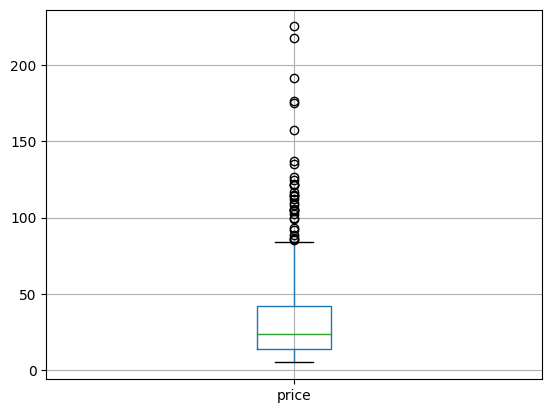

In [ ]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
df_merge.boxplot(column="price")
plt.show()

In [ ]:
#Autre méthode avec plotly express
px.box(data_frame=df_merge, y="price", title="Boxplot des prix", )

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [ ]:
#Calculer la moyenne du prix
moyenne_prix = df_merge["price"].mean()
print("La moyenne des prix est de: ", moyenne_prix)
#Calculer l'écart-type du prix
ecart_type_prix = df_merge["price"].std()
print("L'écart-type des prix est de: ", ecart_type_prix)
#Calculer le Z-score
z_score_price = moyenne_prix / ecart_type_prix
print("Le z-score est de: ", z_score_price)

La moyenne des prix est de:  32.568111888111886
L'écart-type des prix est de:  27.86325936821672
Le z-score est de:  1.1688550667285513


In [ ]:
#Quel est le seuil prix dont z-score est supérieur à 3?
df_outliers = df_merge[df_merge["price"].apply(lambda x: abs(x - moyenne_prix) / ecart_type_prix) > 3]
print("Le seuil prix pour le z-score de 3: ", df_outliers["price"].min())

Le seuil prix pour le z-score de 3:  116.4


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [ ]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
df_erp_price_describe = df_erp[["price"]].describe()
df_erp_price_describe

,price
count,825.000000
mean,32.415636
std,26.795849
min,5.200000
25%,14.600000
50%,24.400000
75%,42.000000
max,225.000000


In [ ]:
#Définissez un seuil pour les articles "outliers" en prix
seuil_outliers = df_erp_price_describe.loc['75%']["price"] + (df_erp_price_describe.loc['75%']["price"] - df_erp_price_describe.loc['25%']["price"]) * 1.5
print("Les 'outliers' se situent à : {}".format(seuil_outliers))

Les 'outliers' se situent à : 83.1


In [ ]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"
nombre_articles_outliers = df_erp[df_erp["price"] >= seuil_outliers].shape[0]
proportion_articles_outliers = df_erp[df_erp["price"] >= seuil_outliers].shape[0] / df_erp.shape[0]
print(f"Nombre d'articles au dessus du seuil des outliers: {nombre_articles_outliers}")
print("Proportion d'articles au dessus du seuil des outliers: {}%".format(round(proportion_articles_outliers * 100, 0)))

Nombre d'articles au dessus du seuil des outliers: 37
Proportion d'articles au dessus du seuil des outliers: 4.0%


In [ ]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?
df_merge[df_merge["price"] >= seuil_outliers]

,product_id,onsale_web,price,stock_quantity,id_web,sku,total_sales,post_title,post_excerpt,post_name,_merge,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
38,4055,0,86.1,0,NaN,NaN,NaN,NaN,NaN,NaN,left_only,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217,4115,1,100.0,11,15382,15382,0.0,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,"Le nez est puissant, dominant, riche, sur la f...",zind-humbrecht-riesling-gc-rangen-thann-clos-s...,both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,4132,1,88.4,5,11668,11668,0.0,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,Le nez dévoile déjà une belle intensité de fru...,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
490,4352,1,225.0,0,15940,15940,5.0,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Issu d’un assemblage de 70% de Pinot Noir du g...,champagne-egly-ouriet-grand-cru-millesime-2008,both,1.5 kg,Champagne,Egly-Ouriet,champagne-egly-ouriet-grand-cru-millesime-2008,Blanc,"30% Chardonnay, 70% Pinot Noir",NaN,10 ans et +,75cl,"12,50%",10°C,"Apéritif, Crustacés, Desserts, Poissons"
494,4355,1,126.5,2,12589,12589,11.0,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,Le Blanc de Noirs représente le meilleur du sa...,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,both,1.5 kg,Champagne,Egly-Ouriet,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,Blanc,Pinot Noir,NaN,5-10 ans,75cl,"12,50%",10°C,"Apéritif, Desserts, Tartes aux fruits"
502,4359,1,85.6,0,13853,13853,1.0,Champagne Larmandier-Bernier Grand Cru Les Che...,Belle maîtrise de ce millésime compliqué en Ch...,champagne-larmandier-bernier-grand-cru-vieille...,both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
528,4402,1,176.0,8,3510,3510,13.0,Cognac Frapin VIP XO,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,cognac-frapin-vip-xo,both,1.5 kg,NaN,NaN,cognac-frapin-vip-xo,NaN,NaN,NaN,NaN,70cl,40%,NaN,NaN
530,4404,1,108.5,2,3507,3507,2.0,Cognac Frapin Château de Fontpinot XO,"Exclusivement vendangé, distillé, vieilli et m...",cognac-frapin-fontpinot-xo,both,1.5 kg,NaN,NaN,cognac-frapin-fontpinot-xo,NaN,NaN,NaN,NaN,70cl,41%,NaN,NaN
534,4406,1,157.0,3,7819,7819,0.0,Cognac Frapin Château de Fontpinot 1989 20 Ans...,Eau-de-Vie distillée à partir de raisins de Gr...,cognac-frapin-chateau-de-fontpinot-1989-20-ans,both,1.5 kg,NaN,NaN,cognac-frapin-chateau-de-fontpinot-1989-20-ans,NaN,NaN,NaN,NaN,70cl,"41,3%",NaN,NaN
536,4407,1,104.0,6,3509,3509,1.0,Cognac Frapin Cigar Blend,Ce cognac bénéficie d'un vieillissement plus l...,cognac-frapin-cigar-blend,both,1.5 kg,NaN,NaN,cognac-frapin-cigar-blend,NaN,NaN,NaN,NaN,70cl,40%,NaN,NaN


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA et des quantités vendues</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [ ]:
##############################
# Calculer le CA su site web #
##############################

#Créez une colonne calculant le CA par article
df_merge["ca_par_article"] = df_merge["price"] * df_merge["total_sales"]
#Calculez la somme de la colonne "ca_par_article"
print("Le chiffre d'affaire est de {} €".format(df_merge["ca_par_article"].sum()))
#Ce résultat correspond au chiffre d'affaire du site web



Le chiffre d'affaire est de 70568.6 €


<ipython-input-498-8b38146d1ef6>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
###############################
# Palmares des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
df_merge.sort_values("ca_par_article", ascending=False, inplace=True)
#Réinitialiser l'index du dataset par un reset_index
df_merge.reset_index(drop=True, inplace=True)
#Afficher les 20 premier articles en CA
df_merge.sort_values(by="ca_par_article", ascending=False).head(20)


<ipython-input-499-f25817ebec4f>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,product_id,onsale_web,price,stock_quantity,id_web,sku,total_sales,post_title,post_excerpt,post_name,_merge,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets,ca_par_article
0,4334,1,49.0,0,7818,7818,96.0,Champagne Gosset Grand Blanc de Blancs,La bulle fine et presente se dirige vers la su...,champagne-gosset-grand-blanc-de-blanc,both,1.5 kg,Champagne,Gosset,champagne-gosset-grand-blanc-de-blanc,Blanc,Chardonnay,NaN,4 ans,75cl,12%,10°C,"Apéritif, Coquilles Saint Jacques, Huîtres, Po...",4704.0
1,4144,1,49.0,11,1662,1662,87.0,Champagne Gosset Grand Rosé,"Le nez exprime sans détour la fraise, dans sa ...",champagne-gosset-grand-rose,both,1.5 kg,Champagne,Gosset,champagne-gosset-grand-rose,NaN,"50% Chardonnay, 50% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Desserts, Foie gras, Poissons",4263.0
2,4402,1,176.0,8,3510,3510,13.0,Cognac Frapin VIP XO,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,cognac-frapin-vip-xo,both,1.5 kg,NaN,NaN,cognac-frapin-vip-xo,NaN,NaN,NaN,NaN,70cl,40%,NaN,NaN,2288.0
3,4142,1,53.0,8,11641,11641,30.0,Champagne Gosset Grand Millésime 2006,"L'attaque est ample, gourmande avec une belle ...",champagne-gosset-grand-millesime-2006,both,1.5 kg,Champagne,Gosset,champagne-gosset-grand-millesime-2006,Blanc,"44% Chardonnay, 56% Pinot Noir",2015.0,8-10 ans,75cl,12%,10°C,"Agneau, Apéritif, Fromage de chèvre, Noix de S...",1590.0
4,4141,1,39.0,1,304,304,40.0,Champagne Gosset Grande Réserve,"Le nez, ouvert et expressif, évoque les fruits...",gosset-champagne-grande-reserve,both,1.5 kg,Champagne,Gosset,gosset-champagne-grande-reserve,Blanc,"10% Pinot Meunier, 45% Chardonnay, 45% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Fruits cuits, Sucré-salé, Tajine",1560.0
5,4355,1,126.5,2,12589,12589,11.0,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,Le Blanc de Noirs représente le meilleur du sa...,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,both,1.5 kg,Champagne,Egly-Ouriet,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,Blanc,Pinot Noir,NaN,5-10 ans,75cl,"12,50%",10°C,"Apéritif, Desserts, Tartes aux fruits",1391.5
6,4352,1,225.0,0,15940,15940,5.0,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Issu d’un assemblage de 70% de Pinot Noir du g...,champagne-egly-ouriet-grand-cru-millesime-2008,both,1.5 kg,Champagne,Egly-Ouriet,champagne-egly-ouriet-grand-cru-millesime-2008,Blanc,"30% Chardonnay, 70% Pinot Noir",NaN,10 ans et +,75cl,"12,50%",10°C,"Apéritif, Crustacés, Desserts, Poissons",1125.0
7,4153,1,29.0,0,16237,16237,36.0,Elian Daros Côtes du Marmandais Clos Baquey 2015,"<span id=""u689-24"">Clos Baquey</span> est tr...",elian-daros-cotes-du-marmandais-clos-baquey-2015,both,1.5 kg,Sud Ouest,Elian Daros,elian-daros-cotes-du-marmandais-clos-baquey-2015,Rouge,"Abouriou, Cabernet Franc, Cabernet Sauvignon, ...",2014.0,10-15 ans,75cl,13%,16°C,"Gibier, Grillades, Viande rouge",1044.0
8,6206,1,25.2,120,16580,16580,41.0,Domaine Giudicelli Patrimonio Blanc 2019,Ce Patrimonio Blanc signé Muriel Giudicelli no...,domaine-giudicelli-patrimonio-blanc-2019,both,1.5 kg,Corse,Domaine Giudicelli,domaine-giudicelli-patrimonio-blanc-2019,Blanc,Vermentino,2020.0,3-5 ans,75cl,"13,5%",11°C,"Fruits de mer, Langoustes, Poissons, Risotto",1033.2
9,4068,1,16.6,157,16416,16416,62.0,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,"Avec ses arômes de cassis, de myrtille, de cer...",gilles-robin-crozes-hermitage-papillon-2019,both,1.5 kg,Rhône,Gilles Robin,gilles-robin-crozes-hermitage-papillon-2019,Rouge,100% Syrah,2021.0,3-5 ans,75cl,"13,5%",15°C,"Apéritif, Charcuterie, Viande rouge, Volaille",1029.2


In [ ]:
#Graphique en barre des 20 premiers articles avec plotly express
px.bar(data_frame=df_merge[:20][::-1], y="post_title", x="ca_par_article", orientation="h", title="20 pemiers articles en CA")

In [ ]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
df_merge["part_ca"] = df_merge["ca_par_article"] / df_merge["ca_par_article"].sum()
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merge['cum_part_ca'] = df_merge['part_ca'].cumsum()
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
print("Le nombre d'articles représentant 80% du CA: {} articles".format(df_merge[df_merge["cum_part_ca"] <= 0.8].shape[0]))
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
print("Cela correspond à {}% du catalogue".format((round(df_merge[df_merge["cum_part_ca"] <= 0.8].shape[0] / df_merge.shape[0] * 100, 2))))

Le nombre d'articles représentant 80% du CA: 130 articles
Cela correspond à 18.18% du catalogue


<ipython-input-501-faae2279e90c>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-501-faae2279e90c>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_merge.head()

,product_id,onsale_web,price,stock_quantity,id_web,sku,total_sales,post_title,post_excerpt,post_name,_merge,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets,ca_par_article,part_ca,cum_part_ca
0,4334,1,49.0,0,7818,7818,96.0,Champagne Gosset Grand Blanc de Blancs,La bulle fine et presente se dirige vers la su...,champagne-gosset-grand-blanc-de-blanc,both,1.5 kg,Champagne,Gosset,champagne-gosset-grand-blanc-de-blanc,Blanc,Chardonnay,NaN,4 ans,75cl,12%,10°C,"Apéritif, Coquilles Saint Jacques, Huîtres, Po...",4704.0,0.066659,0.066659
1,4144,1,49.0,11,1662,1662,87.0,Champagne Gosset Grand Rosé,"Le nez exprime sans détour la fraise, dans sa ...",champagne-gosset-grand-rose,both,1.5 kg,Champagne,Gosset,champagne-gosset-grand-rose,NaN,"50% Chardonnay, 50% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Desserts, Foie gras, Poissons",4263.0,0.060409,0.127068
2,4402,1,176.0,8,3510,3510,13.0,Cognac Frapin VIP XO,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,cognac-frapin-vip-xo,both,1.5 kg,NaN,NaN,cognac-frapin-vip-xo,NaN,NaN,NaN,NaN,70cl,40%,NaN,NaN,2288.0,0.032422,0.159490
3,4142,1,53.0,8,11641,11641,30.0,Champagne Gosset Grand Millésime 2006,"L'attaque est ample, gourmande avec une belle ...",champagne-gosset-grand-millesime-2006,both,1.5 kg,Champagne,Gosset,champagne-gosset-grand-millesime-2006,Blanc,"44% Chardonnay, 56% Pinot Noir",2015.0,8-10 ans,75cl,12%,10°C,"Agneau, Apéritif, Fromage de chèvre, Noix de S...",1590.0,0.022531,0.182021
4,4141,1,39.0,1,304,304,40.0,Champagne Gosset Grande Réserve,"Le nez, ouvert et expressif, évoque les fruits...",gosset-champagne-grande-reserve,both,1.5 kg,Champagne,Gosset,gosset-champagne-grande-reserve,Blanc,"10% Pinot Meunier, 45% Chardonnay, 45% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Fruits cuits, Sucré-salé, Tajine",1560.0,0.022106,0.204128


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [ ]:
#############################
# Calculer le 20 / 80 en  quantité #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
df_merge["part_quantité"] = df_merge["ca_par_article"] / df_merge["ca_par_article"].sum()
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merge['part_quantité'] = df_merge['part_ca'].cumsum()
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
print("Le nombre d'articles représentant 80% des ventes en quantité: {} articles".format(df_merge[df_merge["part_quantité"] <= 0.8].shape[0]))
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
print("Cela correspond à {}% du catalogue".format((round(df_merge[df_merge["part_quantité"] <= 0.8].shape[0] / df_merge.shape[0] * 100, 2))))

Le nombre d'articles représentant 80% des ventes en quantité: 130 articles
Cela correspond à 18.18% du catalogue


<ipython-input-503-64d42a7f7bd7>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-503-64d42a7f7bd7>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
###############################
# Palmares des articles en quantité #
###############################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
df_merge.sort_values("total_sales", ascending=False, inplace=True)
#Réinitialiser l'index du dataset par un reset_index
df_merge.reset_index(drop=True, inplace=True)
#Afficher les 20 premier articles en quantité
df_merge.sort_values(by="part_quantité", ascending=False).head(20)

<ipython-input-504-e79f7c1b4002>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,product_id,onsale_web,price,stock_quantity,id_web,sku,total_sales,post_title,post_excerpt,post_name,_merge,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets,ca_par_article,part_ca,cum_part_ca,part_quantité
713,7338,1,16.3,45,16230,16230,0.0,Domaine Saint-Nicolas Vin de France Blanc Les ...,Issu d'un assemblage de chenin blanc et de cha...,domaine-saint-nicolas-fiefs-vendeens-blanc-les...,both,1.5 kg,Vallée de la Loire,Saint-Nicolas,domaine-saint-nicolas-fiefs-vendeens-blanc-les...,Blanc,"Chardonnay, Chenin",2019.0,3-5 ans,75cl,14%,12°C,"Crustacés, Fromages, Poissons",0.0,0.000000,1.0,1.0
501,4901,1,41.0,36,14802,14802,0.0,Domaine Des Croix Beaune 1er Cru Les Cent Vign...,"Une belle robe pourpre. Le nez est complexe, t...",domaine-des-croix-beaune-1er-cru-les-cent-vign...,both,1.5 kg,Bourgogne,Domaine des Croix,domaine-des-croix-beaune-1er-cru-les-cent-vign...,Rouge,Pinot Noir,2019.0,8-10 ans,75cl,"12,50%",15°C,"Boeuf bourguignon, Viande Blanche, Viande en s...",0.0,0.000000,1.0,1.0
494,4793,1,18.7,17,15730,15730,0.0,Maurice Schoech Pinot Gris Grand Cru Schlossbe...,"Nez juvénile sur les fruits blancs, le froment...",maurice-schoech-pinot-gris-grand-cru-schlossbe...,both,1.5 kg,Alsace,Maurice Schoech,maurice-schoech-pinot-gris-grand-cru-schlossbe...,Blanc,Pinot Gris,2018.0,8-10 ans,75cl,13%,12°C,"Choucroute, Cuisine Exotique, Foie gras, Viand...",0.0,0.000000,1.0,1.0
495,4794,1,41.6,0,12771,12771,0.0,Maurice Schoech Riesling Grand Cru Rangen de T...,"Nez sur la pierre, des touches fumées, de la r...",maurice-schoech-riesling-grand-cru-rangen-de-t...,both,1.5 kg,Alsace,Maurice Schoech,maurice-schoech-riesling-grand-cru-rangen-de-t...,Blanc,Riesling,2018.0,10-15 ans,75cl,13%,12°C,"Choucroute, Crustacés, Poissons, Viande Blanch...",0.0,0.000000,1.0,1.0
496,3849,1,34.3,0,15296,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017,both,1.5 kg,Rhône,Pierre Jean Villa,pierre-jean-villa-saint-joseph-tilde-2017,Rouge,100% Syrah,2019.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille",0.0,0.000000,1.0,1.0
497,4885,1,18.7,6,14981,14981,0.0,Saumaize-Michelin Mâcon Vergisson Sur La Roche...,"<div id=""wrapper"">\n<div id=""container-wrapper...",saumaize-michelin-macon-vergisson-sur-la-roche...,both,1.5 kg,Bourgogne,Saumaize-Michelin,saumaize-michelin-macon-vergisson-sur-la-roche...,Blanc,Chardonnay,2020.0,NaN,75cl,13%,12°C,"Apéritif, Fromages, Poissons, Volaille",0.0,0.000000,1.0,1.0
498,4888,1,27.9,53,15776,15776,0.0,Saumaize-Michelin Pouilly-Fuissé Les Ronchevat...,"<div id=""wrapper"">\n<div id=""container-wrapper...",saumaize-michelin-pouilly-fuisse-les-ronchevat...,both,1.5 kg,Bourgogne,Saumaize-Michelin,saumaize-michelin-pouilly-fuisse-les-ronchevat...,Blanc,Chardonnay,2020.0,4-7 ans,75cl,"13,5%",12°C,"Fromages, Poisson en sauce, Viande Blanche, Vo...",0.0,0.000000,1.0,1.0
309,4858,1,6.5,257,16342,16342,1.0,Château Turcaud Bordeaux Rosé 2019,"<div id=""wrapper"">\n<div id=""container-wrapper...",chateau-turcaud-rose-2019,both,1.5 kg,Bordeaux,Château Turcaud,chateau-turcaud-rose-2019,Rosé,"Cabernet Franc, Cabernet Sauvignon, Merlot",2020.0,3 ans,75cl,"12,50%",10°C,"Apéritif, Charcuterie, Grillades, Poisson gril...",6.5,0.000092,1.0,1.0
499,4889,1,25.3,0,16037,16037,0.0,Saumaize-Michelin Pouilly-Fuissé Vignes Blanch...,"<div id=""wrapper"">\n<div id=""container-wrapper...",saumaize-michelin-pouilly-fuisse-vignes-blanch...,both,1.5 kg,Bourgogne,Saumaize-Michelin,saumaize-michelin-pouilly-fuisse-vignes-blanch...,Blanc,Chardonnay,2020.0,3-5 ans,75cl,13%,12°C,"Fromages, Poisson en sauce, Viande Blanche, Vo...",0.0,0.000000,1.0,1.0
500,4783,1,29.5,5,13754,13754,0.0,Maurice Schoech Pinot Gris Vendanges Tardives ...,"Vendangé en un seul passage, les raisins de Pi...",maurice-schoech-pinot-gris-vendanges-tardives-...,both,1.5 kg,Alsace,Maurice Schoech,maurice-sch

In [ ]:
#Graphique en barre des 20 premiers articles avec plotly express
px.bar(data_frame=df_merge[:20][::-1], y="post_title", x="total_sales", orientation="h", title="20 premiers articles en quantité")

In [ ]:
df_merge.shape[0]

715

In [ ]:
df_merge.info()
len(df_merge)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   product_id               715 non-null    int64   
 1   onsale_web               715 non-null    int64   
 2   price                    715 non-null    float64 
 3   stock_quantity           715 non-null    int64   
 4   id_web                   714 non-null    object  
 5   sku                      714 non-null    object  
 6   total_sales              714 non-null    float64 
 7   post_title               714 non-null    object  
 8   post_excerpt             714 non-null    object  
 9   post_name                714 non-null    object  
 10  _merge                   715 non-null    category
 11  poids                    611 non-null    object  
 12  Région                   586 non-null    object  
 13  Domaine                  577 non-null    object  
 14  Appellatio

715

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [ ]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.
df_merge.to_excel("df_merge.xlsx", index=False)

In [ ]:
import os

In [ ]:
repertoire_de_travail = os.getcwd()

print("Répertoire de travail actuel :", repertoire_de_travail)

Répertoire de travail actuel : /content
